**Logistic Regression Author : Sumon Ghosh (HITK)**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load the dataset.
df = pd.read_csv('titanic.csv')
print(df.head(5))
'''
survival:    Survival
PassengerId: Unique Id of a passenger.
pclass:    Ticket class
sex:    Sex
Age:    Age in years
sibsp:    # of siblings / spouses aboard the Titanic
parch:    # of parents / children aboard the Titanic
ticket:    Ticket number
fare:    Passenger fare
cabin:    Cabin number
embarked:    Port of Embarkation
'''

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


'\nsurvival:    Survival\nPassengerId: Unique Id of a passenger.\npclass:    Ticket class\nsex:    Sex\nAge:    Age in years\nsibsp:    # of siblings / spouses aboard the Titanic\nparch:    # of parents / children aboard the Titanic\nticket:    Ticket number\nfare:    Passenger fare\ncabin:    Cabin number\nembarked:    Port of Embarkation\n'

**Analyzing data **

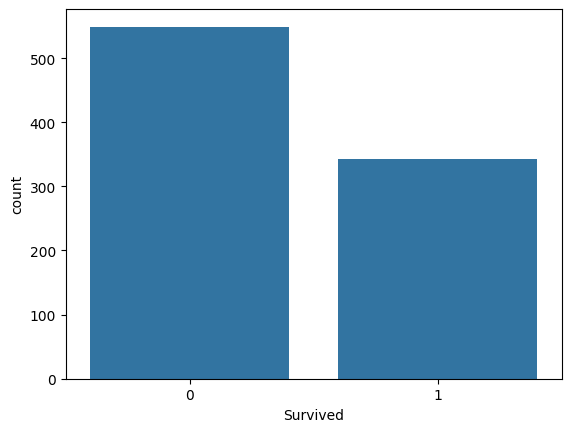

In [ ]:
#how many survived or not were there:
sns.countplot(data=df,x=df['Survived'])
plt.show()

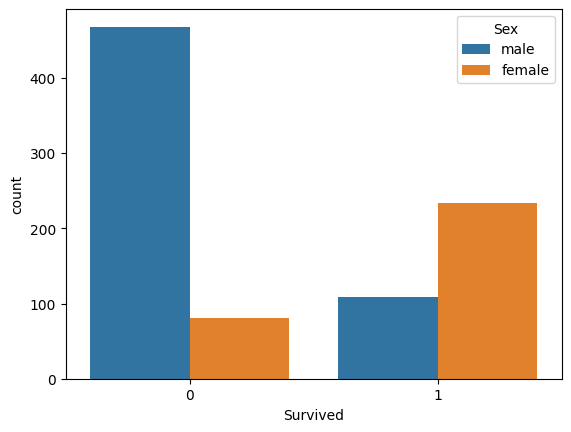

In [ ]:
#check the relationship between the variables.
#Let’s see how many people survived divided by sex
sns.countplot(data=df, x=df['Survived'], hue=df['Sex'] )
plt.show()

<Axes: ylabel='Frequency'>

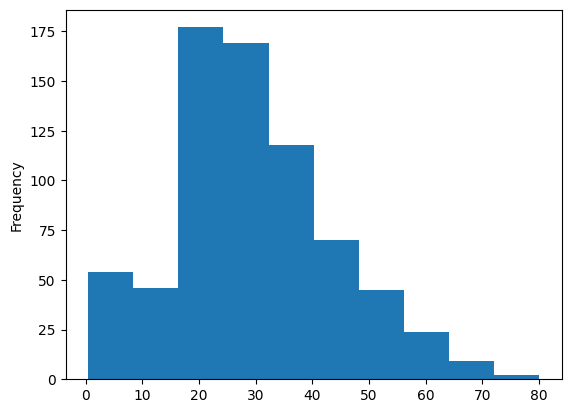

In [ ]:
#Histogram of Age
df["Age"].plot.hist()

<Axes: xlabel='Pclass', ylabel='Age'>

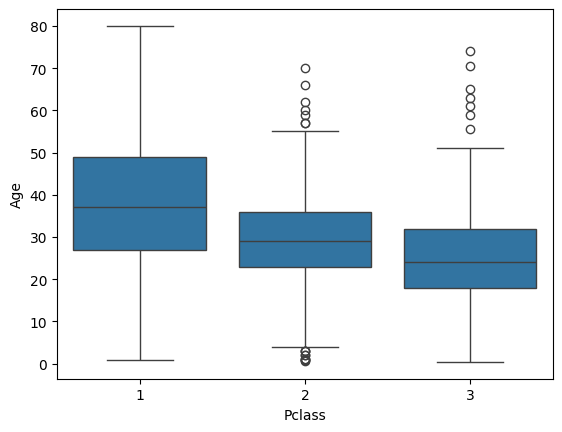

In [ ]:
#See ages regarding the corresponding age average per class
sns.boxplot(x='Pclass',y='Age',data=df)

**Data Wrangling**

<Axes: >

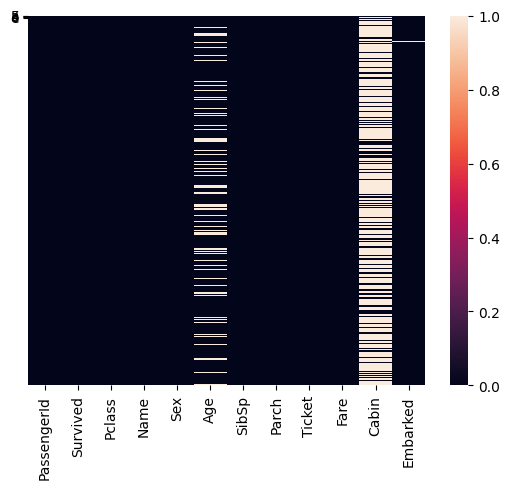

In [ ]:
#df.info()
#check the Null Value
#df.isnull()
#df.isnull().sum()
sns.heatmap(df.isnull(),yticklabels='False')

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Col_1       0
Col_2       0
Q           0
S           0
dtype: int64


<Axes: >

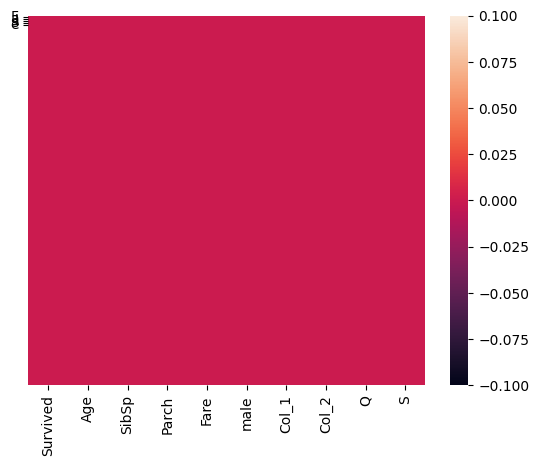

In [ ]:
#Drop Cabin column
#df.drop('Cabin',axis=1,inplace=True)

#Drop Null Value
df.dropna(inplace=True)
print(df.isnull().sum())

sns.heatmap(df.isnull(),yticklabels='False')

In [ ]:
#Create dummies variable for catagorical Data and drop the first column
#pd.get_dummies(df['Sex'])

sex=pd.get_dummies(df['Sex'],drop_first=True)
pclass=pd.get_dummies(df['Pclass'],drop_first=True)
embarked=pd.get_dummies(df['Embarked'],drop_first=True)


In [ ]:
# Concat all dummies variable into data Set
df=pd.concat([df,sex,pclass,embarked],axis=1)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,2,3,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,False,False,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False,False,True,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,False,False,False,False,True


In [ ]:
# Remove some columns that we are not going to use for our model.
df.drop(['PassengerId','Name','Sex','Ticket','Embarked','Pclass'],axis=1,inplace=True)
df.head(5)

,Survived,Age,SibSp,Parch,Fare,Cabin,male,2,3,Q,S
1,1,38.0,1,0,71.2833,C85,False,False,False,False,False
3,1,35.0,1,0,53.1000,C123,False,False,False,False,True
6,0,54.0,0,0,51.8625,E46,True,False,False,False,True
10,1,4.0,1,1,16.7000,G6,False,False,True,False,True
11,1,58.0,0,0,26.5500,C103,False,False,False,False,True


In [ ]:
df.drop(['Cabin'],axis=1,inplace=True) # drop cabin feature from the dataset

In [ ]:
df=df.rename(columns={2: 'Col_1',3:'Col_2'}) # rename those feature which are integer
df

,Survived,Age,SibSp,Parch,Fare,male,Col_1,Col_2,Q,S
1,1,38.0,1,0,71.2833,False,False,False,False,False
3,1,35.0,1,0,53.1000,False,False,False,False,True
6,0,54.0,0,0,51.8625,True,False,False,False,True
10,1,4.0,1,1,16.7000,False,False,True,False,True
11,1,58.0,0,0,26.5500,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,False,False,False,False,True
872,0,33.0,0,0,5.0000,True,False,False,False,True
879,1,56.0,0,1,83.1583,False,False,False,False,False
887,1,19.0,0,0,30.0000,False,False,False,False,True


In [ ]:
# Create Test and Train Set
#https://www.bitdegree.org/learn/train-test-split

from sklearn.model_selection import train_test_split
X = df.drop("Survived",axis=1)
Y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
X_train

,Age,SibSp,Parch,Fare,male,Col_1,Col_2,Q,S
356,22.0,0,1,55.0000,False,False,False,False,True
737,35.0,0,0,512.3292,True,False,False,False,False
75,25.0,0,0,7.6500,True,False,True,False,True
487,58.0,0,0,29.7000,True,False,False,False,False
572,36.0,0,0,26.3875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...
647,56.0,0,0,35.5000,True,False,False,False,False
679,36.0,0,1,512.3292,True,False,False,False,False
345,24.0,0,0,13.0000,False,True,False,False,True
690,31.0,1,0,57.0000,True,False,False,False,True


In [ ]:
# Load the Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# how accurate is our model for predictions
predictions = logmodel.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print(score)


0.7272727272727273


In [ ]:
# Let’s see the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 8,  9],
       [ 6, 32]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.47      0.52        17
           1       0.78      0.84      0.81        38

    accuracy                           0.73        55
   macro avg       0.68      0.66      0.66        55
weighted avg       0.72      0.73      0.72        55

